# Question A.4

This notebook documents the development of plots for average portfolio return $E[R_{p,t}]$ and the volatility $Var(R_{p,t})$ as a function of $k > 0$, the risk aversion coefficient.

## Libraries

For our calculations and plots, we want to import the following libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

We first read in the most recent augmentation of the dataframe.

In [2]:
#Read in newest augmented dataframe
df = pd.read_csv('../data/augmented_data_A3.csv', index_col = [0], parse_dates = True)

We now view the data.

In [3]:
df.head()

,Return_with_Dividends,Return_without_Dividends,RiskFree_Rate_1Month_Forward,Return_1Month_Forward,PD_t,delta_d,Predicted R_t,Sigma,beta_t
date,,,,,,,,,
1998-02-07,0.304277,0.143167,0.350638,0.055277,7.095540,0.303119,0.078501,0.069727,-55.973845
1998-02-10,0.291903,0.154534,0.363007,0.025068,8.404637,0.303119,0.078501,0.069727,-58.517826
1998-02-11,0.269282,0.179072,0.365795,0.043227,13.070375,0.585262,0.078501,0.069727,-59.091427
1998-02-12,0.290409,0.160366,0.377143,0.056165,8.922924,-0.216997,0.078501,0.069727,-61.425462
1998-02-13,0.268346,0.149079,0.350271,0.074432,9.634514,0.225464,0.078501,0.069727,-55.898266


## Plotting $E[R_{p,t}]$

Now as a function of $k$, as explained in the accompanying pdf, we need to augment the data using the following calculation.

$$R_{p,t} = \frac{\beta_t (R_t - R_{f,t})}{k} + R_{f,t}$$

We do this by first defining the function as specified:

In [6]:
#Define function that carries out the calculation
def Exp_R_pt_k (k):

    #Define variables using the columns
    beta_t = df["beta_t"]
    R_t = df["Return_1Month_Forward"]
    R_ft = df["RiskFree_Rate_1Month_Forward"]
    sigma_t = df["Sigma"]
    
    #Define R_pt using the formula above
    R_pt = (beta_t*(R_t - R_ft))/(k) + R_ft
    
    #Return the mean of this value
    return R_pt.mean()

We can then define a reasonable set of $k$ values, and produce the plot.

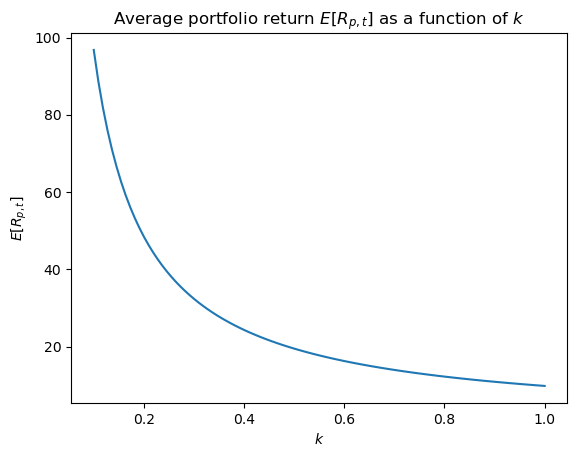

In [7]:
#Define range of values of k to plot
k_exp = np.linspace(0.1, 1 , 100)

#Define list to store the function values
exp_line = []

#Define for loop to iterate through the domain, and produce its function value
for k in k_exp:
    exp_line.append(Exp_R_pt_k(k))

#Plot the domain and the codomain
plt.plot(k_exp, exp_line)

#Rename the plot labels
plt.title(r'Average portfolio return $E[R_{p,t}]$ as a function of $k$')
plt.ylabel(r'$E[R_{p,t}]$')
plt.xlabel(r'$k$')

#Save figure in the relavent directory
plt.savefig('../figures/Exp_R_pt_k.png')

#Print plot
plt.show()

## Plotting $Var(R_{p,t})$

Now as a function of $k$, as explained in the accompanying pdf, we use the same calculation, namely:

$$R_{p,t} = \frac{\beta_t (R_t - R_{f,t})}{k} + R_{f,t}$$

In [10]:
#Define function to carry out the calculation above
def Var_R_pt_k(k):
    
    #Define variables using the columns
    beta_t = df["beta_t"]
    R_t = df["Return_1Month_Forward"]
    R_ft = df["RiskFree_Rate_1Month_Forward"]
    sigma_t = df["Sigma"]
    
    #Calculate the R_pt column for this particular k
    R_pt = (beta_t*(R_t - R_ft))/(k) + R_ft
    
    #Return the variance of this estimate
    return np.var(R_pt) 

Once again we define a range of suitable $k$ values, and then produce a plot.

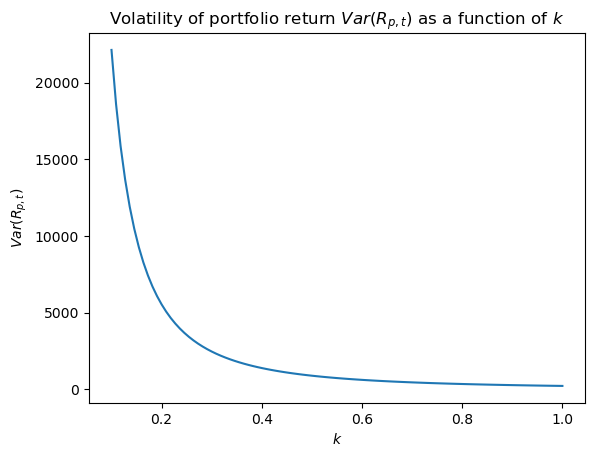

In [11]:
#Define a range of suitable values for k to plot on
k_var = np.linspace(0.1, 1 ,100)

#Plot k and its function output
var_line = []

#Define for loop to iterate through the domain, and produce its function value
for k in k_var:
    var_line.append(Var_R_pt_k(k))
    
#Plot the domain and the codomain
plt.plot(k_var, var_line)

#Rename labels
plt.title(r'Volatility of portfolio return $Var(R_{p,t})$ as a function of $k$')
plt.ylabel(r'$Var(R_{p,t})$')
plt.xlabel(r'$k$')

#Save figure to data folder
plt.savefig('../figures/Var_R_pt_k.png')

#Print plot
plt.show()